In [1]:
import os
filename = 'criteo_sample.txt'
path = os.path.join(os.getcwd(), filename)

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

In [3]:
from deepctr.models import DeepFM
from deepctr.inputs import  SparseFeat, DenseFeat,get_fixlen_feature_names

In [105]:
data = pd.read_csv(path)
data.head(7)

,label,I1,I2,I3,I4,I5,I6,I7,I8,I9,...,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26
0,0,NaN,3,260.0,NaN,17668.0,NaN,NaN,33.0,NaN,...,e5ba7672,87c6f83c,NaN,NaN,0429f84b,NaN,3a171ecb,c0d61a5c,NaN,NaN
1,0,NaN,-1,19.0,35.0,30251.0,247.0,1.0,35.0,160.0,...,d4bb7bd8,6fc84bfb,NaN,NaN,5155d8a3,NaN,be7c41b4,ded4aac9,NaN,NaN
2,0,0.0,0,2.0,12.0,2013.0,164.0,6.0,35.0,523.0,...,e5ba7672,675c9258,NaN,NaN,2e01979f,NaN,bcdee96c,6d5d1302,NaN,NaN
3,0,NaN,13,1.0,4.0,16836.0,200.0,5.0,4.0,29.0,...,e5ba7672,52e44668,NaN,NaN,e587c466,NaN,32c7478e,3b183c5c,NaN,NaN
4,0,0.0,0,104.0,27.0,1990.0,142.0,4.0,32.0,37.0,...,e5ba7672,25c88e42,21ddcdc9,b1252a9d,0e8585d2,NaN,32c7478e,0d4a6d1a,001f3601,92c878de
5,0,0.0,-1,63.0,40.0,1470.0,61.0,4.0,37.0,46.0,...,e5ba7672,d3303ea5,21ddcdc9,b1252a9d,7633c7c8,NaN,32c7478e,17f458f7,001f3601,71236095
6,0,0.0,370,4.0,1.0,1787.0,65.0,14.0,25.0,489.0,...,3486227d,642f2610,55dd3565,b1252a9d,5c8dc711,NaN,423fab69,45ab94c8,2bf691b1,c84c4aec


In [9]:
data.columns

Index(['label', 'I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8', 'I9', 'I10',
       'I11', 'I12', 'I13', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8',
       'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18',
       'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26'],
      dtype='object')

In [55]:
sparse_feats= ['C'+str(i) for i in range(1,27)]
dense_feats = ['I'+str(i) for i in range(1, 14)]

In [148]:
y = ['label']

In [106]:
data[sparse_feats].head(7)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26
0,05db9164,08d6d899,9143c832,f56b7dd5,25c83c98,7e0ccccf,df5c2d18,0b153874,a73ee510,8f48ce11,...,e5ba7672,87c6f83c,NaN,NaN,0429f84b,NaN,3a171ecb,c0d61a5c,NaN,NaN
1,68fd1e64,04e09220,95e13fd4,a1e6a194,25c83c98,fe6b92e5,f819e175,062b5529,a73ee510,ab9456b4,...,d4bb7bd8,6fc84bfb,NaN,NaN,5155d8a3,NaN,be7c41b4,ded4aac9,NaN,NaN
2,05db9164,38a947a1,3f55fb72,5de245c7,30903e74,7e0ccccf,b72ec13d,1f89b562,a73ee510,acce978c,...,e5ba7672,675c9258,NaN,NaN,2e01979f,NaN,bcdee96c,6d5d1302,NaN,NaN
3,05db9164,8084ee93,02cf9876,c18be181,25c83c98,NaN,e14874c9,0b153874,7cc72ec2,2462946f,...,e5ba7672,52e44668,NaN,NaN,e587c466,NaN,32c7478e,3b183c5c,NaN,NaN
4,05db9164,207b2d81,5d076085,862b5ba0,25c83c98,fbad5c96,17c22666,0b153874,a73ee510,534fc986,...,e5ba7672,25c88e42,21ddcdc9,b1252a9d,0e8585d2,NaN,32c7478e,0d4a6d1a,001f3601,92c878de
5,68fd1e64,207b2d81,9dd3c4fc,a09fab49,25c83c98,NaN,271190b7,5b392875,a73ee510,49d5fa15,...,e5ba7672,d3303ea5,21ddcdc9,b1252a9d,7633c7c8,NaN,32c7478e,17f458f7,001f3601,71236095
6,05db9164,2a69d406,fcae8bfa,13508380,25c83c98,NaN,cd846c62,0b153874,a73ee510,3b08e48b,...,3486227d,642f2610,55dd3565,b1252a9d,5c8dc711,NaN,423fab69,45ab94c8,2bf691b1,c84c4aec


In [41]:
data[dense_feats].head(7)

,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,I11,I12,I13
0,0.0,3,260.0,0.0,17668.0,0.0,0.0,33.0,0.0,0.0,0.0,0.0,0.0
1,0.0,-1,19.0,35.0,30251.0,247.0,1.0,35.0,160.0,0.0,1.0,0.0,35.0
2,0.0,0,2.0,12.0,2013.0,164.0,6.0,35.0,523.0,0.0,3.0,0.0,18.0
3,0.0,13,1.0,4.0,16836.0,200.0,5.0,4.0,29.0,0.0,2.0,0.0,4.0
4,0.0,0,104.0,27.0,1990.0,142.0,4.0,32.0,37.0,0.0,1.0,0.0,27.0
5,0.0,-1,63.0,40.0,1470.0,61.0,4.0,37.0,46.0,0.0,1.0,0.0,40.0
6,0.0,370,4.0,1.0,1787.0,65.0,14.0,25.0,489.0,0.0,7.0,0.0,25.0


In [107]:
#substituting NaNs 
data[sparse_feats] = data[sparse_feats].fillna('-1', )
data[dense_feats] = data[dense_feats].fillna(0,)

In [108]:
le= preprocessing.LabelEncoder()
le.fit(data['C19'])
le.classes_#unique classes in data['C19'] before fit_transform method

array(['-1', '0053530c', '083e89d9', '1d04f4a4', '1d1eb838', '21ddcdc9',
       '2442feac', '2b558521', '2e30f394', '2f4b9dd2', '39e30682',
       '42e59f55', '444a605d', '49463d54', '4a237258', '4b1019ff',
       '4cc48856', '54591762', '55dd3565', '566c492c', '5b885066',
       '6301e460', '6d82104d', '6f3756eb', '712d530c', '738584ec',
       '7be4df37', '92524a76', 'a34d2cf6', 'af1445c4', 'b1fb78cc',
       'b6baba3f', 'ba92e49d', 'bdffef68', 'bf212c4c', 'c79aad78',
       'cc4c70c1', 'cf99e5de', 'd913d8f1', 'e27c6abe', 'edb3d180',
       'f30f7842', 'fc134659', 'ff6cdd42'], dtype=object)

In [117]:
le.fit(le.fit_transform(data['C19']))
le.classes_#unique classes in C19 after fit_transform method

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43])

In [122]:
#label encoding sparse features
from sklearn import preprocessing
for feat in sparse_feats:
    le = preprocessing.LabelEncoder()
    data[feat]=le.fit_transform(data[feat])
    
data[sparse_feats].head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26
0,0,4,96,146,1,4,163,1,1,72,...,8,66,0,0,3,0,1,96,0,0
1,11,1,98,98,1,6,179,0,1,89,...,7,52,0,0,47,0,7,112,0,0
2,0,18,39,52,3,4,140,2,1,93,...,8,49,0,0,25,0,6,53,0,0
3,0,45,7,117,1,0,164,1,0,20,...,8,37,0,0,156,0,0,32,0,0
4,0,11,59,77,1,5,18,1,1,45,...,8,14,5,3,9,0,0,5,1,47


In [ ]:
#hash encoding
#for feat in sparse_feats:
#    lbe = HashEncoder()
#    data[feat] = lbe.transform(data[feat])

In [36]:
#le.fit(["paris", "paris", "tokyo", "amsterdam"])

LabelEncoder()

In [37]:
#list(le.classes_)

['amsterdam', 'paris', 'tokyo']

In [40]:
#le.transform(["paris","paris","amsterdam", "tokyo", "tokyo", "paris"])

array([1, 1, 0, 2, 2, 1], dtype=int64)

In [123]:
#discretizing dense features
mms = MinMaxScaler(feature_range=(0,1))
data[dense_feats] = mms.fit_transform(data[dense_feats])
data[dense_feats].head(5)

,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,I11,I12,I13
0,0.0,0.001332,0.092362,0.000000,0.034825,0.000000,0.000000,0.673469,0.000000,0.0,0.00000,0.0,0.000000
1,0.0,0.000000,0.006750,0.402299,0.059628,0.117284,0.003322,0.714286,0.154739,0.0,0.03125,0.0,0.343137
2,0.0,0.000333,0.000710,0.137931,0.003968,0.077873,0.019934,0.714286,0.505803,0.0,0.09375,0.0,0.176471
3,0.0,0.004664,0.000355,0.045977,0.033185,0.094967,0.016611,0.081633,0.028046,0.0,0.06250,0.0,0.039216
4,0.0,0.000333,0.036945,0.310345,0.003922,0.067426,0.013289,0.653061,0.035783,0.0,0.03125,0.0,0.264706


In [124]:
#Generating feature columns
sparse_feature_cols = [SparseFeat(feat, dimension=data[feat].nunique())
                        for feat in sparse_feats]
dense_feature_cols = [DenseFeat(feat, 1)
                      for feat in dense_feats]


In [125]:
sparse_feature_cols[:4]#4/27 sparse feature cols

[SparseFeat(name='C1', dimension=27, use_hash=False, dtype='int32', embedding_name='C1', embedding=True),
 SparseFeat(name='C2', dimension=92, use_hash=False, dtype='int32', embedding_name='C2', embedding=True),
 SparseFeat(name='C3', dimension=172, use_hash=False, dtype='int32', embedding_name='C3', embedding=True),
 SparseFeat(name='C4', dimension=157, use_hash=False, dtype='int32', embedding_name='C4', embedding=True)]

In [126]:
dense_feature_cols[:4] #4/13 dense feature cols

[DenseFeat(name='I1', dimension=1, dtype='float32'),
 DenseFeat(name='I2', dimension=1, dtype='float32'),
 DenseFeat(name='I3', dimension=1, dtype='float32'),
 DenseFeat(name='I4', dimension=1, dtype='float32')]

In [133]:
dnn_feature_cols = sparse_feature_cols + dense_feature_cols
linear_feature_cols = sparse_feature_cols + dense_feature_cols

feature_names = get_fixlen_feature_names(linear_feature_cols + dnn_feature_cols)
print(feature_names)

['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8', 'I9', 'I10', 'I11', 'I12', 'I13']


In [128]:
data.head(5)

,label,I1,I2,I3,I4,I5,I6,I7,I8,I9,...,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26
0,0,0.0,0.001332,0.092362,0.000000,0.034825,0.000000,0.000000,0.673469,0.000000,...,8,66,0,0,3,0,1,96,0,0
1,0,0.0,0.000000,0.006750,0.402299,0.059628,0.117284,0.003322,0.714286,0.154739,...,7,52,0,0,47,0,7,112,0,0
2,0,0.0,0.000333,0.000710,0.137931,0.003968,0.077873,0.019934,0.714286,0.505803,...,8,49,0,0,25,0,6,53,0,0
3,0,0.0,0.004664,0.000355,0.045977,0.033185,0.094967,0.016611,0.081633,0.028046,...,8,37,0,0,156,0,0,32,0,0
4,0,0.0,0.000333,0.036945,0.310345,0.003922,0.067426,0.013289,0.653061,0.035783,...,8,14,5,3,9,0,0,5,1,47


In [145]:
train, test = train_test_split(data, test_size=0.2)
print('train shape:', train.shape, '\ntest shape:', test.shape)

train_model_input = [train[name] for name in feature_names]
test_model_input = [test[name] for name in feature_names]
#list concatenating whole columns from train df & test df in order following feature_names
print('\nSize of train_model_input:',len(train_model_input))

train shape: (160, 40) 
test shape: (40, 40)

Size of train_model_input: 39


In [159]:
model = DeepFM(linear_feature_cols,dnn_feature_cols,task='binary')
model.compile("adam", "binary_crossentropy",
              metrics=['binary_crossentropy'], )

history = model.fit(train_model_input, train[y].values,
                    batch_size=64, epochs=64, verbose=2, validation_split=0.2, )
pred_ans = model.predict(test_model_input, batch_size=64)

Train on 128 samples, validate on 32 samples
Epoch 1/64
 - 2s - loss: 0.7034 - binary_crossentropy: 0.7034 - val_loss: 0.6950 - val_binary_crossentropy: 0.6950
Epoch 2/64
 - 0s - loss: 0.6727 - binary_crossentropy: 0.6727 - val_loss: 0.6857 - val_binary_crossentropy: 0.6857
Epoch 3/64
 - 0s - loss: 0.6444 - binary_crossentropy: 0.6444 - val_loss: 0.6770 - val_binary_crossentropy: 0.6770
Epoch 4/64
 - 0s - loss: 0.6144 - binary_crossentropy: 0.6144 - val_loss: 0.6699 - val_binary_crossentropy: 0.6699
Epoch 5/64
 - 0s - loss: 0.5806 - binary_crossentropy: 0.5805 - val_loss: 0.6649 - val_binary_crossentropy: 0.6649
Epoch 6/64
 - 0s - loss: 0.5475 - binary_crossentropy: 0.5475 - val_loss: 0.6631 - val_binary_crossentropy: 0.6630
Epoch 7/64
 - 0s - loss: 0.5103 - binary_crossentropy: 0.5103 - val_loss: 0.6659 - val_binary_crossentropy: 0.6659
Epoch 8/64
 - 0s - loss: 0.4740 - binary_crossentropy: 0.4739 - val_loss: 0.6759 - val_binary_crossentropy: 0.6758
Epoch 9/64
 - 0s - loss: 0.4347 - b

In [154]:
history.history.keys()

dict_keys(['val_loss', 'val_binary_crossentropy', 'loss', 'binary_crossentropy'])

In [155]:
import matplotlib.pyplot as plt

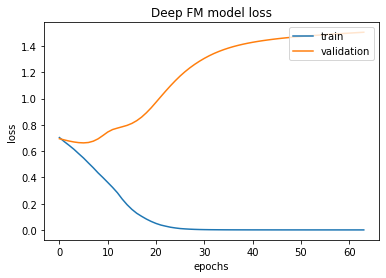

In [160]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Deep FM model loss')
plt.xlabel('epochs')
plt.ylabel('loss')

plt.legend(['train', 'validation'], loc= 'upper right')
#plt.imshow()